In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import eig

from environments.gridworlds.gridworlds_classic import *
from environments.gridworlds.gridworlds_stocastic import *
from plots.gridworlds.gridworld_visualizer import GridWorldVisualizer
from agents.pgp.pgp_softmax import SoftMaxPGP
from plots.agent_plotter import AgentPlotter

np.set_printoptions(precision=2)

100%|██████████| 100/100 [00:00<00:00, 987.29it/s]


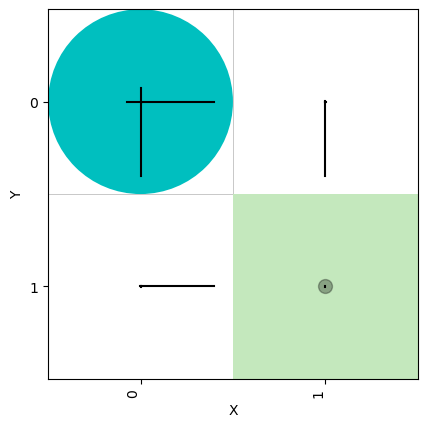

In [3]:
world = ErgodicWorld(nx=2, ny=2, p0=.5, init_locs=np.array([[0, 0]]))
world.add_grid_rewards(rew_values=np.array([10]), rew_loc_start=np.array([[1,1]]))

bot = SoftMaxPGP(world)
bot.learn(n_steps=100, alpha=0.1, min_theta=None)

viz = GridWorldVisualizer(world, bot)

viz.plot_policy()
plt.show()



In [4]:
I = np.eye(world.n_state)

# Transition matrix
P = bot.T

# Limiting matrix
P_star = np.linalg.matrix_power(P, 99999999999)

# Laplacian
L = I - P 

# Fundamental Matrix
F = L + P_star

print("P (transition matrix)")
print(P)
print()

print("P* (limiting matrix)")
print(P_star)
print()


print("L (laplacian)")
print(L)
print()


print("F (fundamental matrix)")
print(F)
print()

P (transition matrix)
[[0.21 0.4  0.4  0.  ]
 [0.17 0.17 0.   0.66]
 [0.17 0.   0.17 0.66]
 [0.   0.17 0.17 0.66]]

P* (limiting matrix)
[[0.07 0.16 0.16 0.62]
 [0.07 0.16 0.16 0.62]
 [0.07 0.16 0.16 0.62]
 [0.07 0.16 0.16 0.62]]

L (laplacian)
[[ 0.79 -0.4  -0.4   0.  ]
 [-0.17  0.83  0.   -0.66]
 [-0.17  0.    0.83 -0.66]
 [ 0.   -0.17 -0.17  0.34]]

F (fundamental matrix)
[[ 0.86 -0.24 -0.24  0.62]
 [-0.1   0.99  0.16 -0.04]
 [-0.1   0.16  0.99 -0.04]
 [ 0.07 -0.01 -0.01  0.95]]



In [5]:
s0 = np.array([1, 0, 0, 0])
ones = np.array([1, 1, 1, 1])
ro = P_star[0]


print("ro = {}".format(ro))
print("ro @ P = {}".format(ro @ P))
print()

ro = [0.07 0.16 0.16 0.62]
ro @ P = [0.07 0.16 0.16 0.62]



In [6]:
Pe_val, Pe_vecY, Pe_vecX = eig(P, left=True)

ro_norm = ro / np.sqrt(np.sum(ro**2))
print("ro normalized = {}".format(ro_norm))
print()

print("P eigenvalues")
print(Pe_val)
print()

print("P left eigenvectors")
print(Pe_vecY)
print()

print("P right eigenvectors")
print(Pe_vecX)
print()

ro normalized = [0.1  0.24 0.24 0.94]

P eigenvalues
[-0.31+0.j  1.  +0.j  0.35+0.j  0.17+0.j]

P left eigenvectors
[[-3.16e-01  1.01e-01 -4.50e-01  7.04e-16]
 [ 4.85e-01  2.37e-01 -1.99e-01  7.07e-01]
 [ 4.85e-01  2.37e-01 -1.99e-01 -7.07e-01]
 [-6.55e-01  9.37e-01  8.48e-01 -1.11e-15]]

P right eigenvectors
[[-7.24e-01  5.00e-01 -9.48e-01  1.82e-14]
 [ 4.74e-01  5.00e-01 -1.78e-01  7.07e-01]
 [ 4.74e-01  5.00e-01 -1.78e-01 -7.07e-01]
 [-1.62e-01  5.00e-01  1.93e-01 -4.31e-15]]



In [8]:
PPe_val, PPe_vecY, PPe_vecX = eig(P - P_star, left=True)
Fe_val, Fe_vecY, Fe_vecX = eig(F, left=True)

print("P eigenvalues")
print(Pe_val)
print()

print("F eigenvalues")
print(Fe_val)
print()


print("P right eigenvectors")
print(Pe_vecX)
print()

print("F right eigenvectors")
print(Fe_vecX)
print()


P eigenvalues
[-0.31+0.j  1.  +0.j  0.35+0.j  0.17+0.j]

F eigenvalues
[1.31+0.j 0.65+0.j 1.  +0.j 0.83+0.j]

P right eigenvectors
[[-7.24e-01  5.00e-01 -9.48e-01  1.82e-14]
 [ 4.74e-01  5.00e-01 -1.78e-01  7.07e-01]
 [ 4.74e-01  5.00e-01 -1.78e-01 -7.07e-01]
 [-1.62e-01  5.00e-01  1.93e-01 -4.31e-15]]

F right eigenvectors
[[-7.24e-01  9.48e-01  5.00e-01  1.99e-14]
 [ 4.74e-01  1.78e-01  5.00e-01  7.07e-01]
 [ 4.74e-01  1.78e-01  5.00e-01 -7.07e-01]
 [-1.62e-01 -1.93e-01  5.00e-01 -3.49e-15]]



In [24]:
D = np.eye(4) * 3

W = P > 0

print(P)
print()
print(np.linalg.inv(D) @ W)

[[0.21 0.4  0.4  0.  ]
 [0.17 0.17 0.   0.66]
 [0.17 0.   0.17 0.66]
 [0.   0.17 0.17 0.66]]

[[0.33 0.33 0.33 0.  ]
 [0.33 0.33 0.   0.33]
 [0.33 0.   0.33 0.33]
 [0.   0.33 0.33 0.33]]
